# One-way ANOVA test and pairwise comparisons with TukeyHSD confidence intervals

In [1]:
# imports and setting matplotlib style
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
plt.style.use('ggplot')
#print(plt.style.available)


In [2]:
#dummy data, to be replaced with real data
keys = np.random.choice((0, 1, 2, 3), size=50)
data = np.random.normal(2, 1, size=50)

In [3]:
# separate the data according to keys into a dictionary
data = np.fromiter(data, np.float)
data_sep = {}
for k,v in zip(keys, data): data_sep.setdefault(k,[]).append(v)

In [4]:
print(data_sep)

{0: [-0.044649612431226782, 1.344690041735638, 0.12313812455308315, 2.0866806116736236, 1.4090885963967994, 1.3679049398446677, 1.2713174171331256, 0.81863083216861843, 2.67952804849098, 1.4327617927231346, 1.9741816430902999, 3.3284321707633229, 2.1281056018353599, 1.6300410029237222], 1: [1.4976694043453547, 2.5598166218599729, 1.6673739142148896, 2.3116110443728184, 2.6151500000982346, 2.8776620695675148, 1.9091463614613091], 2: [2.1723997020182049, 2.0029464281270166, 0.51930593057236307, 2.3507380855305811, 2.3216956436392939, 1.4163751743024564, 2.074645805222215, 3.6511618175455771, 1.287091884695434, 1.5040492268863437, 3.5559087843250206, 3.7626701938571534], 3: [2.0717944283584644, 1.4509557107144238, 0.59630875874717582, 2.3180643021279246, 2.0882659968664665, 5.6042239646045751, 0.55794180702186935, 3.6477379629400248, 1.7632578470842397, 2.0561200942735862, 3.985140467507343, 2.8963057805386918, 2.2193278262021625, 3.4440098285571441, 1.951479705782126, 2.139904866974716, 

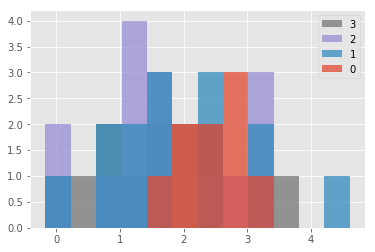

In [13]:
# histogram of data for covenience
n, bins, patches = plt.hist(data_sep.values(), int(sum(map(len, data_sep.values()))/4), histtype='stepfilled', alpha=0.75, label=(str(lab) for lab in data_sep.keys()))
plt.legend()
plt.savefig("histograms.png")
plt.show()

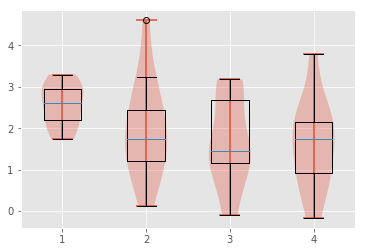

In [14]:
# box plots of data for covenience
plt.boxplot(data_sep.values())
plt.violinplot(data_sep.values())
plt.savefig("boxplots.png")
plt.show()

# Results of anova and pairwise Tukey HSD

In [15]:
anova_results = scipy.stats.f_oneway(*data_sep.values())
print(anova_results[0], anova_results[1])

1.7610098383 0.167854585546


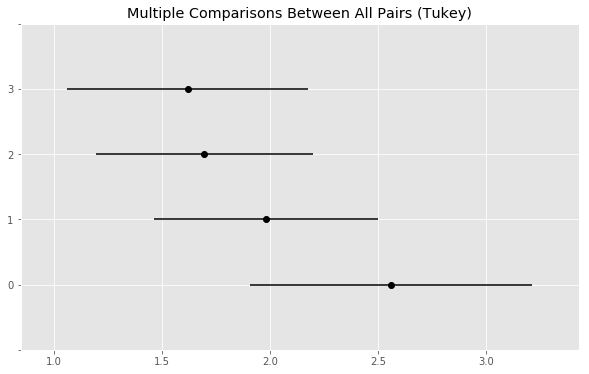

In [21]:
results = pairwise_tukeyhsd(data, keys)
results.plot_simultaneous()

In [8]:
 from IPython.display import HTML, display

 data = [[1,2,3],
         [4,5,6],
         [7,8,9],
         ]

 display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

1,2,3
4,5,6
7,8,9


In [22]:
dir(results)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_multicomp',
 '_results_table',
 '_simultaneous_ci',
 'confint',
 'data',
 'df_total',
 'groups',
 'groupsunique',
 'halfwidths',
 'meandiffs',
 'plot_simultaneous',
 'q_crit',
 'reject',
 'reject2',
 'std_pairs',
 'summary',
 'variance']

In [24]:
results.data

array([ 2.94064482,  2.83475458,  2.0891101 ,  2.61387802,  2.35910114,
        1.2903604 ,  0.82834768,  1.8167313 ,  3.80238598,  1.17274669,
        1.74457004,  3.19768703,  1.75269236,  1.44306468,  1.24420007,
        0.04112797,  0.91028774,  3.16297727,  2.36071998,  3.17996143,
        2.37524401,  1.73060417,  0.80344249,  3.29615384,  2.19350876,
        1.97198897, -0.08442086,  1.18195537,  0.81114333,  1.73340181,
        1.74731708,  2.46256924, -0.16669912,  0.11976302,  4.60768541,
        2.06653973,  0.96944914,  2.5234738 ,  1.71977442,  2.51180259,
        2.32995578,  3.00919851,  0.47393564,  1.04306284,  1.15345459,
        1.62076632,  2.9095148 ,  3.22961147,  3.14120689,  1.3847152 ])

In [35]:
results.variance

1.053089860953107

In [29]:
results.summary()

group1,group2,meandiff,lower,upper,reject
0,1,-0.5791,-1.7479,0.5896,False
0,2,-0.8633,-2.0167,0.2901,False
0,3,-0.9399,-2.1461,0.2664,False
1,2,-0.2842,-1.3008,0.7323,False
1,3,-0.3608,-1.4369,0.7154,False
2,3,-0.0765,-1.136,0.9829,False
